<a href="https://colab.research.google.com/github/jeeva9656/pde-code/blob/main/Experiment_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Laplace Transforms of Piecewise and Impulse Functions

In engineering, signals are not always smooth, continuous functions. They often involve abrupt changes, switching on or off, or extremely short, high-energy events. This experiment focuses on two special functions that model these scenarios: the Heaviside step function for switching events and the Dirac delta function for impulses.

##  Aim
To evaluate and visualize the Laplace Transform of common piecewise and impulse functions.

##  Objectives
- To define piecewise functions in SymPy.
- To understand the Laplace transform of the Heavyside (unit step) and Dirac delta (unit impulse) functions.
- To apply these concepts to analyze the response of an electrical circuit to an impulsive input.

##  Algorithm
1. Import Libraries: Import sympy, numpy, and matplotlib.
2. Define Symbols: Define the symbolic variables for time (t) and complex frequency (s).
3. Define the Piecewise Function: Use SymPy’s sp.Piecewise, sp.Heaviside, or sp.DiracDelta to construct the function in the time domain. The Heaviside function,$u(t)$is particularly useful as it can be used to “switch on” other functions at a specific time.
4. Compute Laplace Transform: Use sp.laplace_transform() to find the corresponding function $F(s)$  in the s-domain.
5. Visualize: Create plots of both the original function $f(t)$ and its transform $ F(s)$ to understand the relationship between the two domains.

## Case Study: The Unit Step Function
Problem: Evaluate the Laplace transform of the Heaviside unit step function, $f(t) = u(t)$  and visualize it. The unit step function is formally defined as:

$$f(t) = \begin{cases} 0 & \text{if } t < 0 \\ 1 & \text{if } t \ge 0 \end{cases}$$

This function represents an input that is turned on to a value of 1 at $t=0$
 and stays on forever.

The Laplace Transform of Heaviside(t) is F(s) = 1/s


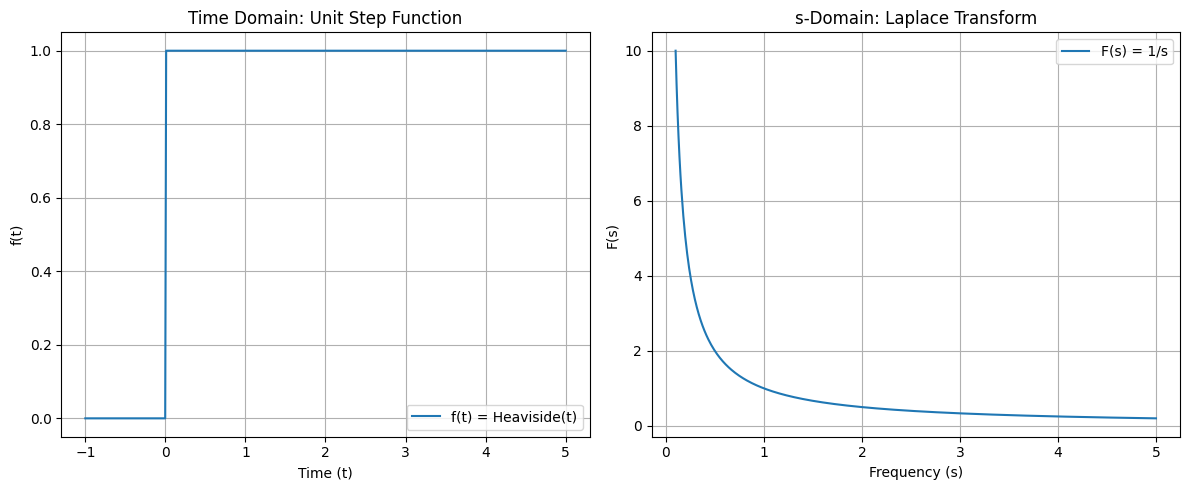

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# --- 1. & 2. Define symbolic variables ---
t, s = sp.symbols('t s')

# --- 3. Define piecewise function (Heaviside step function) ---
# SymPy has a built-in Heaviside function which is more robust
f = sp.Heaviside(t)

# --- 4. Compute Laplace transform ---
# The result is a tuple (transform, convergence plane, conditions)
F_tuple = sp.laplace_transform(f, t, s)
F = F_tuple[0]

print(f"The Laplace Transform of {f} is F(s) = {F}")

# --- 5. Visualize ---
# Convert symbolic functions to numerical functions for plotting
f_numeric = sp.lambdify(t, f, 'numpy')
F_numeric = sp.lambdify(s, F, 'numpy')

# Create time and frequency arrays for plotting
t_vals = np.linspace(-1, 5, 500)
# For F(s)=1/s, we must avoid s=0 for numerical stability
s_vals = np.linspace(0.1, 5, 500)

plt.figure(figsize=(12, 5))

# Time-domain plot
plt.subplot(1, 2, 1)
plt.plot(t_vals, f_numeric(t_vals), label='f(t) = Heaviside(t)')
plt.title("Time Domain: Unit Step Function")
plt.xlabel("Time (t)")
plt.ylabel("f(t)")
plt.grid(True)
plt.legend()

# Frequency-domain plot
plt.subplot(1, 2, 2)
plt.plot(s_vals, F_numeric(s_vals), label='F(s) = 1/s')
plt.title("s-Domain: Laplace Transform")
plt.xlabel("Frequency (s)")
plt.ylabel("F(s)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()